<a href="https://colab.research.google.com/github/sarikasea/Machine-Learning/blob/main/Customer_Segmentation_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Data

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# About the Dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases. We will use a specific type of classification called K-nearest neighbors.


## Data Visualization and Analysis

Let us first look at the class-wise distribution of the data set.


In [4]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


Hence, we can say that we have records of 281 customers who opt for Plus Services, 266 for Basic-services, 236 for Total Services, and 217 for E-Services. It can thus be seen that the data set is mostly balanced between the different classes and requires no special means of accounting for class bias.

We can also visualize the correlation map of the data set to determine how the different features are related to each other.


<Axes: >

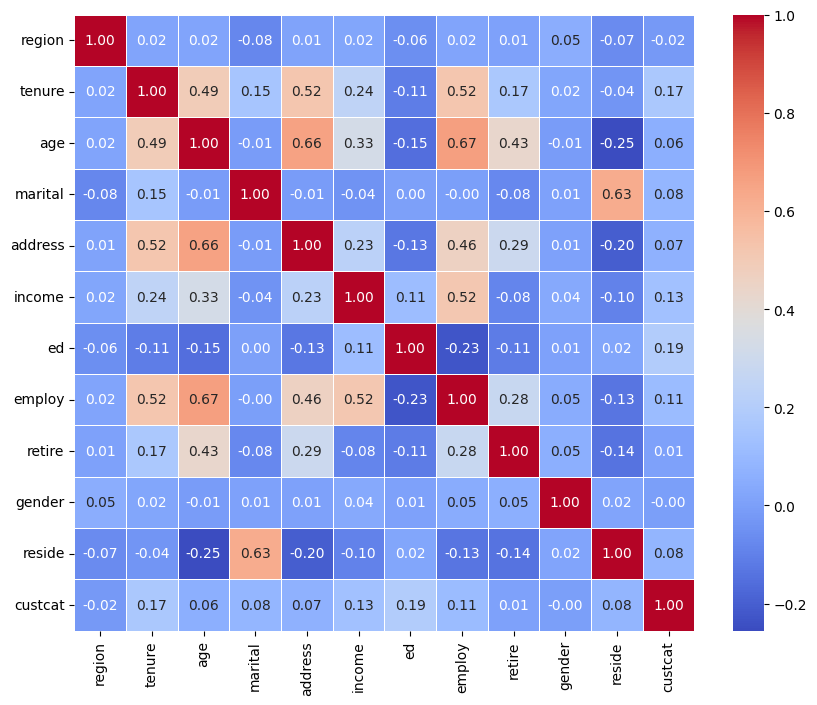

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

As is visible from the correlation map, some features have beeter correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. custcat with all the other features. This will help us identify which features should be focussed on for modeling and which ones can be ignored.

The following code snippet will give us a list of features sorted in the descending order of their absolute correlation values with respect to the target field.

In [6]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


This shows us that the features retire and gender have the least effect on custcat while ed and tenure have the most effect.

## Separat the input and target features

In [9]:
X = df.drop('custcat',axis=1)
y = df['custcat']

## Normalize the Data

Data normalization is important for the KNN model.

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By normalizing / standardizing the data, you ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range).

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.

In [10]:
X_norm = StandardScaler().fit_transform(X)

## Train Test Split

Now, you should separate the training and the testing data. You can retain 20% of the data for testing purposes and use the rest for training. Assigning a random state ensures reproducibility of the results across multiple executions.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

## KNN Classification

### Training



In [12]:
k = 3
#Train Model and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

The choice of 'k' is a crucial parameter in the K-Nearest Neighbors (KNN) algorithm, as it directly impacts the model's bias-variance tradeoff and its ability to generalize to new data.

*   **Small 'k' (e.g., k=1):** A small 'k' makes the model more sensitive to noise in the training data. It has high variance and low bias. This can lead to overfitting, where the model performs very well on the training data but poorly on unseen data. The decision boundary will be more complex and jagged.

*   **Large 'k':** A large 'k' makes the model smoother and less sensitive to noise. It has low variance and high bias. This can lead to underfitting, where the model is too simple and may not capture the underlying patterns in the data well. The decision boundary will be smoother.

*   **Optimal 'k':** The optimal value of 'k' is typically found through cross-validation, where the model is trained and evaluated on different subsets of the data for various 'k' values. The 'k' that yields the best performance on the validation set is chosen. There is no one-size-fits-all answer for the best 'k'; it depends on the specific dataset and problem.

In this notebook, we chose k=3 for demonstration purposes. To find the optimal k, we would typically iterate through a range of k values and evaluate the model's performance (e.g., using accuracy) on a validation set.

### Predicting

Once the model is trained, we can now use this model to generate predictions for the test set.


In [14]:
yhat = knn_model.predict(X_test)

### Accuracy Evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [15]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


## Exercise 1

Can you build the model again, but this time with k=6?


In [16]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


In [17]:
k = 8
knn_model_8 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat8 = knn_model_8.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat8))

Test set Accuracy:  0.325


In the context of machine learning models like KNN, bias and variance are two key sources of error that affect the model's ability to generalize to new data:

*   **Bias:** Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. A high-bias model makes strong assumptions about the data and might not capture the underlying patterns, leading to underfitting. In KNN, a **large 'k'** leads to **high bias** because the model considers a larger neighborhood, smoothing out the decision boundary and potentially ignoring finer details in the data.

*   **Variance:** Variance refers to the model's sensitivity to small fluctuations or noise in the training data. A high-variance model is heavily influenced by the training data and can capture noise as if it were a real pattern, leading to overfitting. In KNN, a **small 'k'** leads to **high variance** because the model focuses on a smaller neighborhood, making the decision boundary more complex and susceptible to the noise in individual data points.

The goal is to find a balance between bias and variance (the bias-variance tradeoff) to build a model that generalizes well to unseen data.

Choosing the correct value of k
K in KNN, is the number of nearest neighbors to examine. However, the choice of the value of 'k' clearly affects the model. Therefore, the appropriate choice of the value of the variable k becomes an important task. The general way of doing this is to train the model on a set of different values of k and noting the performance of the trained model on the testing set. The model with the best value of accuracy_score is the one with the ideal value of the parameter k.

Check the performance of the model for 10 values of k, ranging from 1-9. You can evaluate the accuracy along with the standard deviation of the accuracy as well to get a holistic picture of the model performance.

In [18]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

### Plot the model accuracy for a different number of neighbors.
Now, you can plot the model accuracy and the standard deviation to identify the model with the most suited value of k.


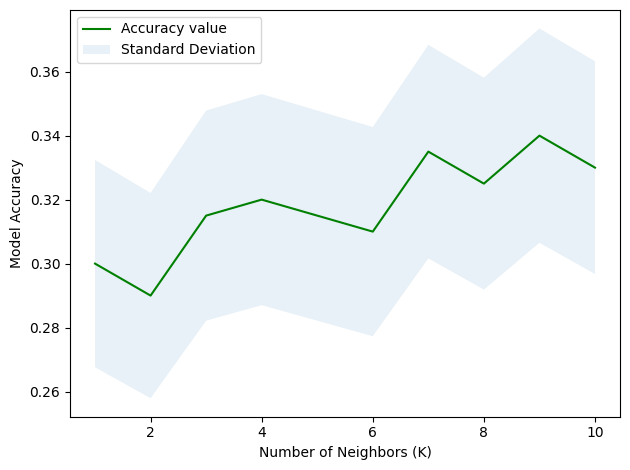

In [19]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.34 with k = 9


However, since this graph is still rising, there can be a chance that the model will give a better performance with an even higher value of k.

## Exercise 2

Run the training model for 30 values of k and then again for 100 values of k. Identify the value of k that best suits this data and the accuracy on the test set for this model.

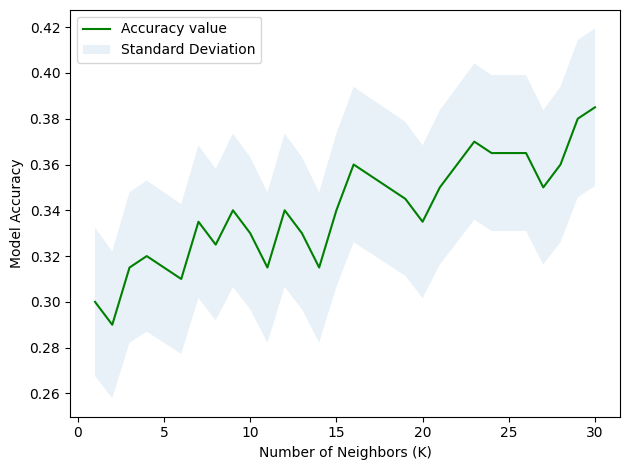

The best accuracy was with 0.385 with k = 30


In [22]:
Ks = 30
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

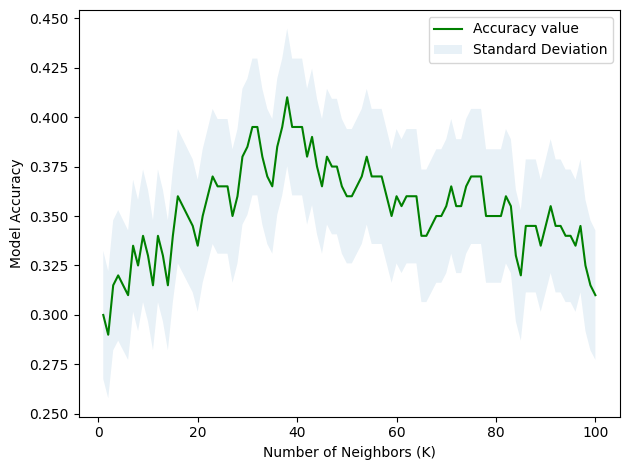

The best accuracy was with 0.41 with k = 38


In [23]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

## Exercise 3

Plot the variation of the accuracy score for the **training set** for 100 value of Ks.


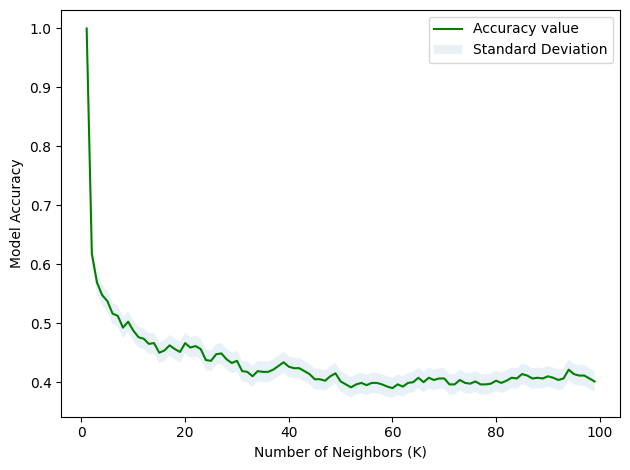

In [24]:
Ks =100
acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_train)
    acc[n-1] = accuracy_score(y_train, yhat)
    std_acc[n-1] = np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),acc,'g')
plt.fill_between(range(1,Ks),acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Exercise 4

Can you justify why the model performance on training data is deteriorating with increase in the value of k?


When k is small (e.g., k=1), the model is highly sensitive to the individual points in the dataset. The prediction for each point is based on its closest neighbor, which can lead to highly specific and flexible boundaries. This leads to overfitting on the training data, meaning the model will perform very well on the training set, potentially achieving 100% accuracy. However, it may generalize poorly to unseen data. When k is large, the model starts to take into account more neighbors when making predictions. This has two main consequences:

Smoothing of the Decision Boundary: The decision boundary becomes smoother, which means the model is less sensitive to the noise or fluctuations in the training data.
Less Specific Predictions: With a larger k, the model considers more neighbors and therefore makes more generalized predictions, which can lead to fewer instances being classified perfectly.
As a result, the model starts to become less flexible, and its ability to memorize the training data (which can lead to perfect accuracy with small k) is reduced.

## Exercise 5

We can see that even the with the optimum values, the KNN model is not performing that well on the given data set. Can you think of the possible reasons for this?


The weak performance on the model can be due to multiple reasons. 1. The KNN model relies entirely on the raw feature space at inference time. If the features do no provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation. 2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN. 3. The algorithm treats all features equally when computing distances. Hence, weakly correalted features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.